<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

# 3장 시카고 샌드위치 맛집 분석

- 3-1 웹 데이터를 가져오는 Beautiful Soup 익히기
- 3-2 크롬 개발자 도구를 이용해서 원하는 태그 찾기
- 3-3 실전:시카고 샌드위치 맛집 소개 사이트에 접근하기
- 3-4 접근한 웹페이지에서 원하는 데이터 추출하고 정리하기
- 3-5 다수의 웹페이지에 자동으로 접근해서 원하는 정보 가져오기
- 3-6 jupyter Notebook에서 상태 진행바를 쉽게 만들어주는 tqdm 모듈
- 3-7 상태 진핸바까지 적용하고 다시 샌드위치 페이지 50개에 접근하기
- 3-8 50개 웹 페이지에 대한 정보 가져오기
- 3-9 맛집 위치를 지도에 표기하기
- 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기
- 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기

2장까지 우리가 다룬 데이터는 엑셀이든 텍스트 파일의 형태였습니다. 이제 3장부터는 데이터를 인터넷에서 직접 얻은 과정을 하려합니다. 이번장은 인터넷에서 웹 페이지의 내용을 가져오는 Beautiful Soup라는 모듈의 기초부터 익히고 시작하겠습니다.

In [1]:
#!pip3 install bs4

BeautifulSoup 에서 bs4를 import 한다.

In [2]:
from bs4 import BeautifulSoup

In [3]:

page = open("./data/03. test_first.html",'r').read()
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


지금은 파일로 다운받은 html을 읽는 것이기 때문에 open 명령으로 일기 옵션('r')을 주고 읽으면 된다. prettify()라는 옵션을 사용하면 들여쓰기가 되어 보기 좋게 나타난ㄷ. html 코드를 soup라는 변수에 저장했는데, 그 soup라는 변수에서 한 단계 아래에서 포함된 태그들을 알고 싶으면 children 이라는 속성을 사용하면 된다.

In [4]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

이때 soup는 문서 전체를 저장한 변수이기 때문에 그 안에서 html태그에 접속하고 싶다면,


In [5]:
html = list(soup.children)[2]
html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

위와 같이 접근할 수 있습니다.

그러면 위와 같은 결과를 얻게 됩니다. 다시 html의 children을 조사해보면

In [6]:
list(html.children)

['\n',
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>,
 '\n',
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>,
 '\n']

이렇게 나타납니다. 우리가 본문으로 흔히 보게되는 부분이 body 태그의 내용입니다. 한 번 더 html의 children 중 3번을 조사해보면 body 태그가 나타납니다.

In [7]:
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

이렇게 children과 parent를 이용해서 태그를 조사할 수 있고 그냥 한 번에 나타낼 수도 있습니다.

In [8]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

이렇게 바로 찾을 수도 있습니다.

In [9]:
list(body.children)

['\n',
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 '\n',
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 '\n',
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>,
 '\n']

또한 body 태그 안에 children의 리스트를 확인할 수 있습니다. 리스트 자료형에 대해서는 뒤에서 다시 다루겠습니다. 지금은 그냥 배열 정도로 생각하고 넘어가겠습니다. 위 코드에서 접근한 대로 단계별로 접근하고 다시 그 구조를 코드 속에 담아두는 것은 체계적으로 생각하고 접급할 수 있는 장점이 있지만, 복잡하고 큰 크기의 페이지를 접근하는 것에는 쉽지 않습니다. 만약 접근해야 할 태그를 알고 있다면 find나 find_all 명령을 많이 사용하게 됩니다.

In [10]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

위와 같이 모든 p태그를 찾는 것입니다. 물론 하나만 찾을 때는 find 명령을 사용할 수있습니다.

In [11]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

이렇게 사용하면 제일 첫 번째 p 태그를 찾아줍니다.

In [12]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

이렇게 p 태그의 class가 outer-text인 것을 찾는 것도 가능합니다.

In [13]:
soup.find_all(class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

혹시 그냥 class 이름으로만 outer-text를 찾을 수도 있습니다.

In [14]:
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

또 id가 first인 태그들을 찾을 수도 있습니다.

In [15]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

그러나 find 명령은 제일 처음 나타난 태그만 찾아주기 때문에 그 다음 태그만 찾고 싶을 때는 다른방법을 사용해야 합니다.

In [16]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

soup의 head에 있는 내용입니다. 여기서 next_sibling 이라는 명령을 사용할 수 있습니다.

In [17]:
soup.head.next_sibling

'\n'

soup의 head 다음에 줄바꿈 문자가 있습니다.

In [18]:
soup.head.next_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

다시 한 번 더 이렇게 head와 같은 위치에 있던 body 태그로 접글할 수 있습니다.

In [19]:
body.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

또한 제일 처음 나타나는 p태그에 대해,

In [20]:
body.p.next_sibling.next_sibling

<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>

위와 같이 next_sibling을 두 번 걸면 그 다음 p 태그로 이동할 수 있다는 것을 알 수 있습니다.

In [21]:
for each_tag in soup.find_all('p'):
     print(each_tag.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



또 get_text()명령으로 태그 안에 있는 텍스트만 가지고 올 수 있습니다.

In [22]:
body.get_text()

'\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n'

body 전체에서 get_text()를 하면 태그가 있던 자리는 줄바꿈(\n)이 표시되고 전체 텍스트를 보여줍니다.

In [23]:
links = soup.find_all('a')
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

클릭 가능한 링크를 의미하는 a 태그를 찾았습니다.

In [24]:
for each in links:
    href = each['href']
    text = each.string
    print(text + ' -> ' + href)

PinkWink -> http://www.pinkwink.kr
Python -> https://www.python.org


### 3-2 크롬 개발자 도구를 이용해서 원하는 태그 찾기

웹 페이지의 태그를 beautiful soup의 결과만 보면서 확인할 수는 없습니다. 원하는 곳의 태그가 무엇인지 확인하는 방법 중 크롬의 개발자 도구를 사용하는 것입니다. 일단 https://finance.naver.com/marketindex/로 접속합니다. 거기서 미국 USB 1,144.00원 이라는 글자에서 환율을 가져오려고 합니다.

In [25]:
from urllib.request import urlopen

먼저 url로 접근하는 경우 urllin에서 urlopen이라는 함수를 import 해둡니다.

In [26]:
url = "https://finance.naver.com/marketindex/"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<script language="javascript" src="/template/head_js.nhn?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20210408173913/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20210408173913/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 USD
 

그리고 해당 페이지를 읽어옵니다. prettify()로 print()를 해도 사실 확인하기는 쉽지 않습니다.

In [35]:
soup.find_all('span', 'value')[0].string

'1,121.00'

혹시 몰라서 find_all로 찾고 리스트로 결과가 반환되니까 첫 번째를 선택하도록 했습니다.

### 3-3 실전: 시카고 샌드위치 맛집 소개 사이트에 접근하기

이제 시카고의 베스트 샌드위치 가게를 소개하고 있는 시카고 매거진 홈페이지에 접속해서 샌드위치 가게 정보를 얻어올 생각입니다.

일단, 접속 주소는 http://goo.gl/wAtvls입니다. 원래 긴 주소인데 구글의 URL Shortener를 사용했습니다.

http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago

In [41]:
import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen

headers = {'User-Agent': 'Mozilla/5.0'}

url = 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'

html = requests.get(url, headers = headers).text

soup =  BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:ho

위 코드를 입력하면 전체 html 코드를 다 받게 됩니다. 그리고 url_base, url_sub로 분리하고 다시 url로 합친 이유는 단지 책에서 표현하려다 보니 한 페이지에 주소가 다 안나와서 입니다.

In [42]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-R

확인한 태그를 이용해서 find_all 명령을 이용해서 div Sammy 태그를 찾아 보았습니다. 내용을 유심히 보니 우리가 찾으려고 하던 내용이 맞습니다. 더 확실히 하기 위해 len 며영으로 길이를 확인해 보면 50이라고 나타납니다.

In [43]:
len(soup.find_all('div', 'sammy'))

50

애초 시카고 매거진의 기사 제목에 있지만 맛집 50개이므로 저 길이가 50이라면 일단 정확하게 찾은것 같습니다. 그 중 첫번째 것만 확인해 보면 원하던 정보가 다 있는 걸로 보입니다.

In [44]:
print(soup.find_all('div', 'sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


### 3-4 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기

그럼 이제 div의 sammy 태그에서 우리가 원하는 정보를 얻는 과정을 보겠습니다.

In [45]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

find_all로 찾은 결과는 bs4.element.Tag라고 하는 형태로 이런 경우 그 변수에 다시 태그로(find, find_all)명령을 사용할 수 있습니다.

In [46]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

그래서 find 명령을 한 번 더 사용하고 sammyRank를 찾아보면 나타납니다. 여기서 text만 취하면 됩니다.

In [47]:
tmp_one.find(class_='sammyRank').get_text()

'1'

get_text() 명령을 사용하면 됩니다. 그러면 랭킹은 얻을 수 있습니다.

In [48]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\nOld Oak Tap\nRead more '

이제 sammyListing을 얻으면 메뉴 이름과 가게 이름이 비록 같이 나오긴 했지만 얻게되었습니다.

In [49]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

또 a태그에서 href 정보를 가지고 클릭했을 때 연결될 주소도 저장할 수 있습니다. 메뉴 이름과 가게이름이 같이 있어서 분리해야 합니다. 저 구조에서 쉽게 접근해 볼 수 있는 것 중하나가 '정규식(Regular Express)'입니다. 

In [50]:
import re

tmp_string = tmp_one.find(class_='sammyListing').get_text()

re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


먼저 당연히 정규식을 쓰기 위해 import re 를 수행 합니다. 그리고 re에서 사용할 명령은 딱 하나 split입니다. 말 그대로 내가 지정한 특정 패턴이 일치하면 분리시킵니다. 저는 \n.이거나, \r\n이면 분리시키고 싶습니다. 그래서 OR 연산자(\,|)을 사용했습니다. 그러면 그 결과가 두 개가 되는데 첫번째 것을 메뉴이름으로, 두 번째 것을 가게 이름으로 하면 됩니다. urllib에 있는 urljoin 이라는 명령입니다. 이 명령을 이용하면 절대경로로 잡힌 url은 그대로 두고 상대결로로 잡힌 url은 절대경로로 변경할 수 있습니다.

In [59]:
from urllib.parse import urljoin

In [60]:
rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()

    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url, item.find('a')['href']))

위 코드는 랭크,메뉴이름,까페이름,각각의 주소를 저장할 빈 list 를 둔 것이다. 그리고 find_all('div', 'sammy')로 찾은 50개의 정보를 가지고 반복문 for을 돌리면서 방금 했던 내용인 정보를 .append 명령으로 빈 리스트에 하나씩 추가하도록 했다. 이코드가 다 수행되고 나면,
(~~습니다. 보다 ~~했다. 식의 글쓰기가 좀더 기억에 남는것 같아 바꾸었습니다.)

In [61]:
rank[:5]

['1', '2', '3', '4', '5']

순위도 잘 저장되었다.

In [62]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

메뉴 이름도,

In [63]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

까페 이름도 잘 받아왔습니다.

In [64]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

마지막으로 url도 잘 받아왔다.

In [65]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

혹시나 하고 네 개의 변수의 길이를 조사해도 괜찮아 보입니다. 이제 이 데이터를 4개의 리스트에 저장할 수는 없으니 pandas를 이용하겠다

In [66]:
import pandas as pd

In [67]:
data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Fried Bologna,Au Cheval,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Woodland Mushroom,Xoco,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Roast Beef,Al’s Deli,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,PB&L,Publican Quality Meats,http://www.chicagomag.com/Chicago-Magazine/Nov...


이렇게 각 컬럼의 이름을 정의하고 해당 자료를 알려준다. pandas로 절리도 잘 됐다. 그런데 하나 아쉬운 것은 컬럼의 순서이다. 보기 좋게 정리하자.

In [68]:
df = pd.DataFrame(data, columns = ['Rank', 'Cafe', 'Menu', 'URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


일차적으로 한 페이지에서 각 원하는 부분의 데이터를 읽어와서 다시 원하는 형태로 정리를 완료 했다. 한 단계 더 나가기 전에 저장해두자.

In [69]:
df.to_csv('./data/03. best_sandwiches_list_chicago.csv', sep=',' ,
         encoding='UTF-8')

### 3-4 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기

이번 장 전에는 시카고의 베스트 샌드위치 각 50개에 대한 정보를 가져오는 페이지를 만드었다. html 페이지로는 하나여서 페이지 간 이동은 필요가 없었다. 그저 한 페이지의 내용을 잘 이해하고 가져오면 됬다. 세부 메뉴를 설명하는 곳을 클릭하면 각각의 또 다른 매거진 기사로 연결된다.

In [70]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

import pandas as pd

In [71]:
df = pd.read_csv('./data/03. best_sandwiches_list_chicago.csv', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


이전에 작업했던 것을 읽어온다. 위 표에서 URL 컬럼에 있는 내용을 50개 읽어서 각 페이지에서 가게 주소, 대표 샌드위치 가격, 가게 전화번호를 얻은 것이다. 그러면 첫 번째 URL 정보를 확인하고 연습 삼아 진행한 다음 50개에 대해 반복문을 적용하겠다.

In [72]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

첫 번째 URL이 있다. 시카고 매거진의 또 다른 페이지이다. 주소를 Beauiful Soup로 읽습니다.

In [73]:
import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen

headers = {'User-Agent': 'Mozilla/5.0'}

url = (df['URL'][0])

html = requests.get(url, headers = headers).text

soup =  BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>1. Old Oak Tap BLT – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_ss

이 상태에서 확인했던 태그를 이용해서 찾습니다.

In [93]:

import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen

headers = {'User-Agent': 'Mozilla/5.0'}

html = (df['URL'][0])

res = requests.get(url, headers=headers)

soup_tmp = BeautifulSoup(res.text)
soup_tmp

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>1. Old Oak Tap BLT – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_ss

In [94]:
print(soup_tmp.find('p', 'addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


원하는 정보가 다 있습니다. 주소와 가격과 전화번호까지 있습니다. 그럼 이 상태에서 텍스느(text)로 가지고 와서 빈 칸으로 나누면 될 것 같습니다.

In [95]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

일단.get_text.split()로 가지고 왔습니다. 원하는 내용은 다 있다.

In [96]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

그리고 split()을 적용해보면 위 결과처럼 나타난다. 여기서 제일 첫 번째는 가격이라는 것이다. 제일 뒤는 웹주소, 두번째는 전화번호이다. 파이썬 리스트에서 제일 뒤는 -1로 호출할 수 있다.

In [97]:
price_tmp.split()[0]

'$10.'

In [98]:
price_tmp.split()[0][:-1]

'$10'

맨 뒤에 점(.)이 항상 붙어서 위와 같이 사용하기도 합니다.

이제 두 번째부터 맨 마지막에서 세 번째까지 선택하고 싶은데 그렇게 해도 list형인 것은 변함없습니다. 바로 하나의 문장을 만들고 싶은 것입니다. 이럴 때 사용하는 명령이 join명령입니다.

In [99]:
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

이렇게 사용할 수 있다. 바로 주소가 되는 것이다.

### 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기

http://goo.gl/f5cHRG 에 접근해보면 영화 평점순으로 정렬되어 있는 정보를 만날 수 있습니다. 여기서 크롬 개발자 도구를 사용해서 영화 제목이 나오는 부분의 태그를 확인합니다.

In [100]:
from bs4 import BeautifulSoup
import pandas as pd

우선 간단하게 BeautifulSoup와 pandas를 import 한다.

In [101]:
from urllib.request import urlopen

url_base = "https://movie.naver.com/"

url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806"

page =urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170806" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [102]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31827" title="헤드윅">헤드윅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=153621" title="댄

찾아 둔 태그를 이용해서 전부 찾으면(find_all) 됩니다.

In [103]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

이렇게 제목만 찾을 수 있다.

In [104]:
soup.find_all('td', 'point')[0].string

'9.32'

그 다음은 포인트를 찾을 수 있다.

In [105]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

이제 날짜를 5월 1일부터 100일간으로 정의하고 그 날짜에 해당하는 영화 정보 전체를 찾도록 한다.

In [106]:
# !pip3 install tqdm 

In [107]:
import urllib
from tqdm import tqdm_notebook

movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0,end)])

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/100 [00:00<?, ?it/s]

변수 html을 지정할 때 중괄호{}로 date라고 잡은 것은 그 밑에 response라는 변수에서 {date}를 변수로 취급하고 내용을 바꿀 것이기 때문이다. 그리고 나서 제목과 포인트를 읽자.

In [109]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})

movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


읽은 내용을 pandas로 저장. 내용에는 날자별로 영화와 포인트가 저장되어 있다. 만약 날짜가 아니라 영화별로 점수의 합산으로 데이터를 보고 싶다면 pivot_table을 사용하자.

In [114]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
"서서평, 천천히 평온하게",9.569.479.489.409.399.359.319.309.299.289.299....
극장판 쿠로코의 농구 라스트 게임,9.539.299.259.269.269.269.279.279.259.239.249....
킹 오브 프리즘 프라이드 더 히어로,9.449.349.279.249.259.279.279.279.269.279.289....
명탐정 코난:진홍의 연가,9.439.239.189.169.109.079.05
레옹,9.389.38


여기서 aggfunc으로 np.sum을 이용해서 합산을 해야 영화별 점수의 합계로 정렬될 것이다. 5월 1일 부터 100일간 점수의 합산으로 볼 때 결과를 보면 고득점 영화 1위부터 5위가 보인다.

In [115]:
tmp = movie.query('name == ["노무현입니다"]')
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


혹은 위 코드처럼 '노무현입니다'라는 영화만 추려서 확인할 수 있습니다. 날짜별 평점의 변화를 확인할 수 있습니다.

No handles with labels found to put in legend.


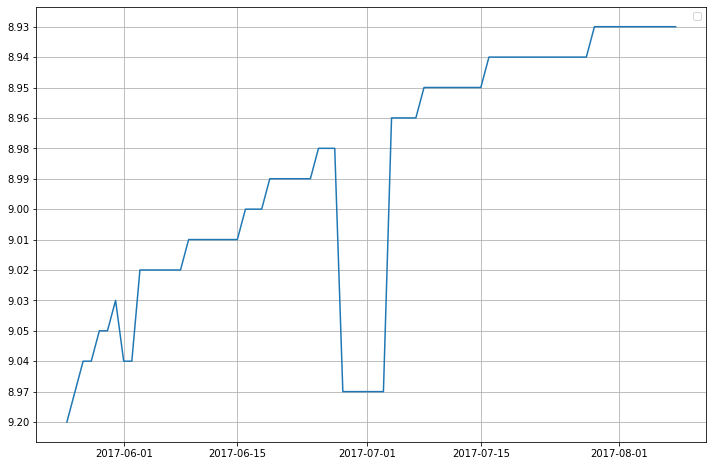

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

당연히 이것만 날짜별로 그려볼 수 있다. 결과는 위 그래프와 같다.

### 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기



In [117]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], values=['point'],aggfunc=['first'])

movie_pivot.head()



first                                                        \
           point                                                         
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
                                                ...                          
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                          \
                                                                           
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕  헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                       
2017-05-01  8.78          8.89   NaN   8.70  NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68  NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70  NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67  NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69  NaN   NaN              9.24   

                   
                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  

[5 rows x 204 columns]

날짜별로 정리되어 있던 데이터를 pivot_table을 이용해서 세로축으로 날짜를 , 가로축에 영화 제목을 넣었다. 주피터노트북 화면에서는 판독하기 어려울 수 있다.

In [131]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [132]:
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


이 데이터에서 pivot_table의 결과로 붙은 컬럼 제목을 하나 정리하겠다.

In [133]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


matplotlib 에서의 한글 문제를 설정하고,

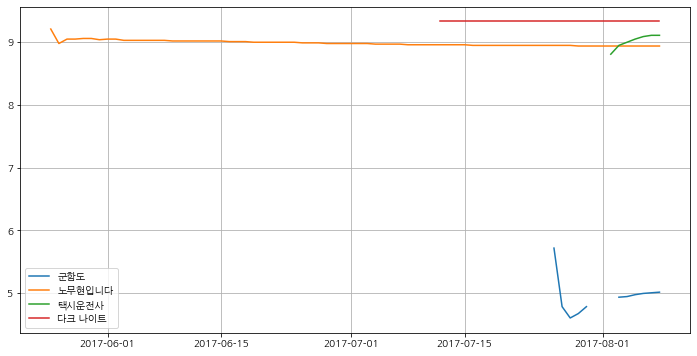

In [134]:
target_col = ['군함도', '노무현입니다', '택시운전사', '다크 나이트']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

결과는 위와 같습니다. '노무현입니다'와 '택시운전사'의 성과가 눈에 보입니다. 그리고 변화 추이도 알 수 있습니다.

- 출처(파이썬으로 데이터 주무르기)